# Valorant Agent Stats for Split Map (as of August 2023)
## Introduction
Welcome Valorant lovers! In this project, I delved into the extensive dataset of Valorant gameplay to analyze how each agent performed on the map 'Split' as of August 2023. By dissecting key statistics such as Kill-Death Ratios (KD), Kill-Death-Assist Ratios (KDA), Win Percentages, Pick Percentages, Average Scores, and more, I aimed to uncover valuable insights into the strengths and weaknesses of each agent in the context of this specific map.

## Project Overview
Valorant, a popular tactical first-person shooter developed by Riot Games, had captivated players worldwide with its strategic gameplay and diverse roster of agents, each equipped with unique abilities. Among the game's various maps, 'Split' stood as a distinct challenge due to its layout and dynamics. In this project, I undertook a comprehensive analysis to shed light on how different agents performed on the 'Split' map. By examining a broad range of statistical indicators, I aimed to provide players with insights that could inform their agent selection strategies and improve their performance on this particular map.

## Project Goals
The primary goals of this analysis were as follows:

**Agent Proficiency**: Explore how each agent's statistics varied on the 'Split' map to determine which agents were more effective in this environment.

**In-Game Impact**: Assess how agents contributed to their team's success by examining their Win Percentages and their role in securing the first blood in matches.

**Player Engagement**: Examine the popularity of each agent on the 'Split' map through Pick Percentages to gain insights into agent preference and trends.

Through these goals, I sought to equip players with a nuanced understanding of how different agents interacted with the 'Split' map's challenges and opportunities. Armed with this information, players can make more informed decisions when selecting their agent and optimizing their strategies for the best possible performance.

Stay tuned to see the analysis of agent statistics on the 'Split' map, revealing which agents thrive in this unique gaming environment!

### Importing Packages

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [34]:
data = pd.read_csv('/kaggle/input/valorant-agent-stats-for-split-map-updated/Valorant Agent Stats for Split Map (as of 08_2023) - Sheet1 (1).csv')
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches
0,Reyna,1.13,14.4/12.8/3.7,0.47,0.10,284,8231285
1,Raze,1.06,13.8/13/3.9,0.46,0.08,293,6358732
2,Sage,0.89,11.3/12.6/5.2,0.46,0.10,228,7996646
3,Jett,1.04,13.4/12.9/3.2,0.45,0.09,279,7707459
4,Omen,1.01,13.8/13.7/4.8,0.44,0.06,274,5113232


### Gathering Data

I started by sorting the KD scores from highest to lowest to see the ranks of each agent.

In [65]:
datakd_sorted = data.sort_values(by='kd', ascending=False)
datakd_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.4/12.8/3.7,0.47,0.10,284,8231285,14.4,12.8,3.7
20,Astra,1.09,17.3/15.8/4.6,0.34,0.02,513,1487472,17.3,15.8,4.6
1,Raze,1.06,13.8/13/3.9,0.46,0.08,293,6358732,13.8,13.0,3.9
13,Chamber,1.05,14.8/14.2/3.1,0.39,0.03,364,2676978,14.8,14.2,3.1
3,Jett,1.04,13.4/12.9/3.2,0.45,0.09,279,7707459,13.4,12.9,3.2


Then, I looked into the KDA of each agent. First, I created three more columns, "kills by kda", "deaths by kda", and "assists by kda". Then I sorted the new columns by descending order.

In [36]:
data.dtypes

agent         object
kd           float64
kda           object
win_pcnt     float64
pick_pcnt    float64
avg_score      int64
Matches        int64
dtype: object

In [37]:
data[['kills_kda', 'deaths_kda', 'assists_kda']] = data['kda'].str.split('/', expand=True)
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.4/12.8/3.7,0.47,0.10,284,8231285,14.4,12.8,3.7
1,Raze,1.06,13.8/13/3.9,0.46,0.08,293,6358732,13.8,13,3.9
2,Sage,0.89,11.3/12.6/5.2,0.46,0.10,228,7996646,11.3,12.6,5.2
3,Jett,1.04,13.4/12.9/3.2,0.45,0.09,279,7707459,13.4,12.9,3.2
4,Omen,1.01,13.8/13.7/4.8,0.44,0.06,274,5113232,13.8,13.7,4.8


In [38]:
data['kills_kda'] = pd.to_numeric(data['kills_kda'])
data['deaths_kda'] = pd.to_numeric(data['deaths_kda'])
data['assists_kda'] = pd.to_numeric(data['assists_kda'])

In [39]:
data_killskda_sorted = data.sort_values(by='kills_kda', ascending=False)
data_killskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
20,Astra,1.09,17.3/15.8/4.6,0.34,0.02,513,1487472,17.3,15.8,4.6
21,Harbor,0.98,16.7/17/4.2,0.28,0.01,639,1165906,16.7,17.0,4.2
19,Breach,0.98,15.3/15.6/4.6,0.35,0.02,431,1874145,15.3,15.6,4.6
13,Chamber,1.05,14.8/14.2/3.1,0.39,0.03,364,2676978,14.8,14.2,3.1
0,Reyna,1.13,14.4/12.8/3.7,0.47,0.10,284,8231285,14.4,12.8,3.7


In [40]:
data_deathskda_sorted = data.sort_values(by='deaths_kda', ascending=False)
data_deathskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
21,Harbor,0.98,16.7/17/4.2,0.28,0.01,639,1165906,16.7,17.0,4.2
20,Astra,1.09,17.3/15.8/4.6,0.34,0.02,513,1487472,17.3,15.8,4.6
19,Breach,0.98,15.3/15.6/4.6,0.35,0.02,431,1874145,15.3,15.6,4.6
18,KAY/O,0.93,14.1/15.1/5.6,0.36,0.03,364,2331838,14.1,15.1,5.6
15,Fade,0.95,13.8/14.5/4.6,0.39,0.03,348,2511506,13.8,14.5,4.6


In [41]:
data_assistskda_sorted = data.sort_values(by='assists_kda', ascending=False)
data_assistskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
6,Skye,0.97,13.4/13.7/5.7,0.43,0.05,289,3844949,13.4,13.7,5.7
18,KAY/O,0.93,14.1/15.1/5.6,0.36,0.03,364,2331838,14.1,15.1,5.6
2,Sage,0.89,11.3/12.6/5.2,0.46,0.10,228,7996646,11.3,12.6,5.2
16,Brimstone,0.93,13.4/14.4/5.2,0.39,0.04,338,3320322,13.4,14.4,5.2
4,Omen,1.01,13.8/13.7/4.8,0.44,0.06,274,5113232,13.8,13.7,4.8


After that, I sorted the win percent of each agent in descending order.

In [42]:
data_winpcnt_sorted = data.sort_values(by='win_pcnt', ascending=False)
data_winpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.4/12.8/3.7,0.47,0.10,284,8231285,14.4,12.8,3.7
2,Sage,0.89,11.3/12.6/5.2,0.46,0.10,228,7996646,11.3,12.6,5.2
1,Raze,1.06,13.8/13/3.9,0.46,0.08,293,6358732,13.8,13.0,3.9
3,Jett,1.04,13.4/12.9/3.2,0.45,0.09,279,7707459,13.4,12.9,3.2
4,Omen,1.01,13.8/13.7/4.8,0.44,0.06,274,5113232,13.8,13.7,4.8


Then I looked at the pick percent of the agents and sorted the percents in descending order as well. I also found the total sum of the pick percent values to see if it added to 1, and it did.

In [43]:
data_pickpcnt_sorted = data.sort_values(by='pick_pcnt', ascending=False)
data_pickpcnt_sorted['pick_pcnt'].sum()
data_pickpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.4/12.8/3.7,0.47,0.10,284,8231285,14.4,12.8,3.7
2,Sage,0.89,11.3/12.6/5.2,0.46,0.10,228,7996646,11.3,12.6,5.2
3,Jett,1.04,13.4/12.9/3.2,0.45,0.09,279,7707459,13.4,12.9,3.2
1,Raze,1.06,13.8/13/3.9,0.46,0.08,293,6358732,13.8,13.0,3.9
4,Omen,1.01,13.8/13.7/4.8,0.44,0.06,274,5113232,13.8,13.7,4.8


I also sorted the number of matched of each agent in descending order.

In [44]:
data_matches_sorted = data.sort_values(by='Matches', ascending=False)
data_matches_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.4/12.8/3.7,0.47,0.10,284,8231285,14.4,12.8,3.7
2,Sage,0.89,11.3/12.6/5.2,0.46,0.10,228,7996646,11.3,12.6,5.2
3,Jett,1.04,13.4/12.9/3.2,0.45,0.09,279,7707459,13.4,12.9,3.2
1,Raze,1.06,13.8/13/3.9,0.46,0.08,293,6358732,13.8,13.0,3.9
4,Omen,1.01,13.8/13.7/4.8,0.44,0.06,274,5113232,13.8,13.7,4.8


Lastly, I sorted the average score of each agent in descending order.

In [45]:
data_avgscore_sorted = data.sort_values(by='avg_score', ascending=False)
data_avgscore_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
21,Harbor,0.98,16.7/17/4.2,0.28,0.01,639,1165906,16.7,17.0,4.2
20,Astra,1.09,17.3/15.8/4.6,0.34,0.02,513,1487472,17.3,15.8,4.6
19,Breach,0.98,15.3/15.6/4.6,0.35,0.02,431,1874145,15.3,15.6,4.6
13,Chamber,1.05,14.8/14.2/3.1,0.39,0.03,364,2676978,14.8,14.2,3.1
18,KAY/O,0.93,14.1/15.1/5.6,0.36,0.03,364,2331838,14.1,15.1,5.6


### Kill-Death Scores of the Valorant Agents in Split

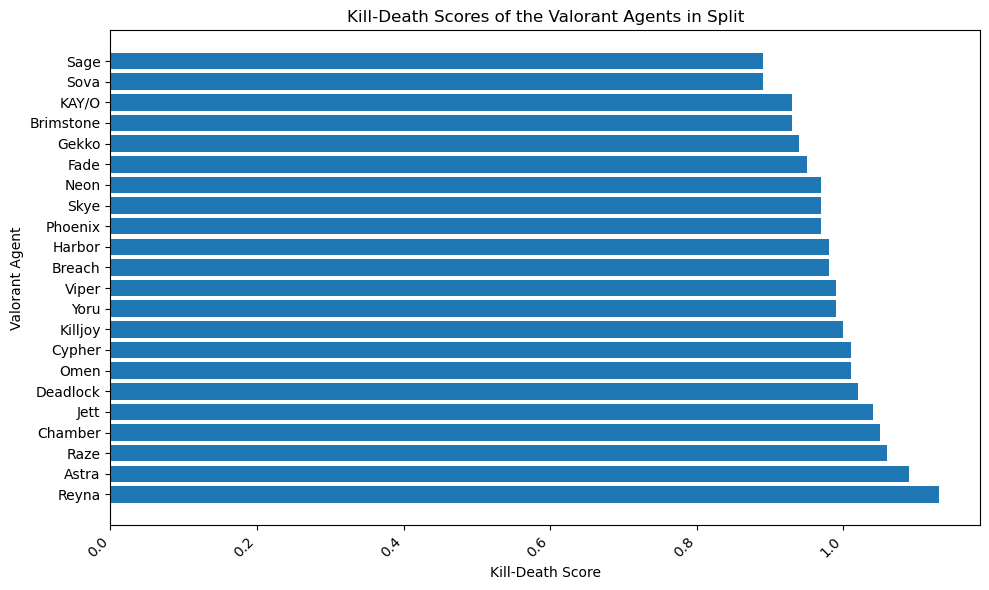

In [46]:
plt.figure(figsize=(10,6))
plt.barh(datakd_sorted['agent'], datakd_sorted['kd'])
plt.xlabel("Kill-Death Score")
plt.ylabel("Valorant Agent")
plt.title("Kill-Death Scores of the Valorant Agents in Split")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
The analysis of Valorant Agent Stats on the "Split" map, based on the KD (Kill-Death) ratio column sorted from highest to lowest, provides intriguing insights into the performance of different agents within the unique context of this map as of August 2023:

**Reyna (KD: 1.13)**: Reyna stands out at the top with the highest KD ratio of 1.13. Her aggressive playstyle and exceptional self-sustain mechanics could prove advantageous on the "Split" map, where close-quarter engagements are common and aggressive pushes can yield higher rewards.

**Astra (KD: 1.09)**: Astra follows closely with a KD ratio of 1.09. Astra's ability to manipulate the battlefield through her control-based skillset could contribute to her effectiveness in creating advantageous situations for securing kills on the "Split" map's tight corridors.

**Raze (KD: 1.06)**: With a KD ratio of 1.06, Raze maintains a strong presence. Her explosive abilities and aggressive approach might find value in the map's intricate pathways, allowing her to capitalize on opponents' positioning and secure impactful eliminations.

**Chamber (KD: 1.05)**: Chamber shares a KD ratio of 1.05 with Raze, indicating the potency of Duelist agents on the "Split" map. The map's verticality and multi-level engagements provide opportunities for agile agents like Chamber to excel and secure eliminations.

**Jett (KD: 1.04)**: Jett remains competitive with a KD ratio of 1.04. Her aerial mobility and ability to quickly reposition align well with the map's architecture, enabling her to swiftly engage opponents from unexpected angles and achieve favorable KD ratios.

These results underscore the significance of agent abilities and playstyles when factoring in the intricacies of the "Split" map. The vertical layout, narrow passageways, and distinct areas of engagement on the map can influence the effectiveness of certain agents. While agents like Reyna, Astra, Raze, Chamber, and Jett display notable KD ratios, it's essential to consider that the map's layout, team dynamics, and strategic approach also contribute to agent performance.

When analyzing the KD ratios of agents on the "Split" map, a common theme emerged:

**Aggressive Duelists Excel**: Agents with aggressive playstyles, often associated with Duelist roles, tend to perform well on the "Split" map. Reyna, Raze, Chamber, and Jett all boast impressive KD ratios, showcasing their ability to engage opponents effectively in close-quarters scenarios and capitalize on aggressive pushes.

### Valorant Agent Kills from KDA in Split

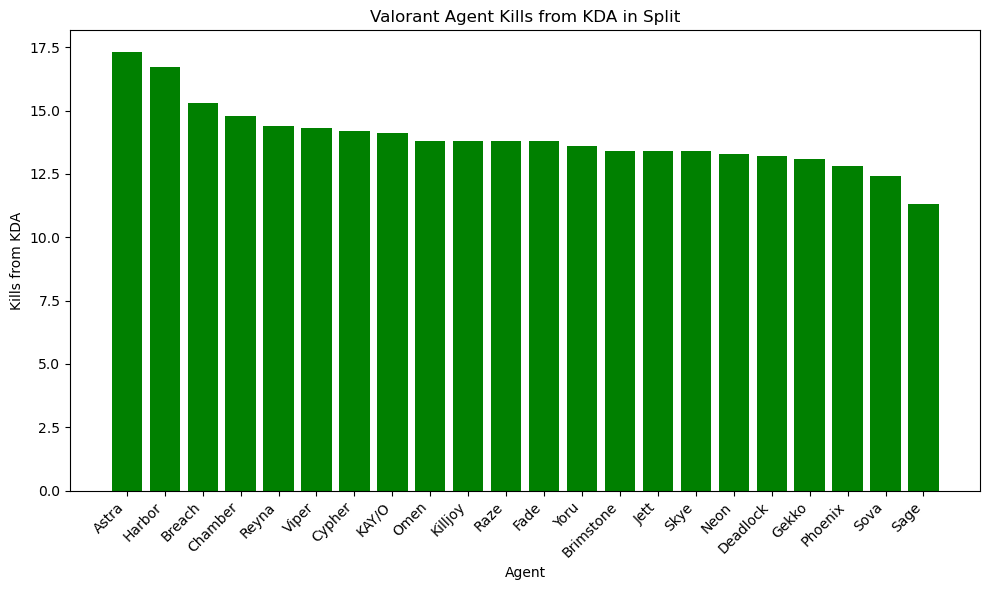

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(data_killskda_sorted['agent'], data_killskda_sorted['kills_kda'], color = 'green')
plt.xlabel('Agent')
plt.ylabel('Kills from KDA')
plt.title('Valorant Agent Kills from KDA in Split')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### FINDINGS:
Analyzing the agent performance on the "Split" map based on the kills per KDA ratio provides valuable insights into their ability to secure eliminations while maintaining a balanced contribution to their team. Here are the key takeaways:

**Astra (Kills per KDA: 1.09)**: Astra's high kills per KDA ratio suggests her effectiveness in securing eliminations while still contributing to the team's overall performance. Her ability to control engagements and manipulate the battlefield might play a significant role in her success on the "Split" map.

**Harbor (Kills per KDA: 0.98)**: Harbor's balanced kills per KDA ratio showcases his ability to secure eliminations while closely aligning with his overall KDA. This suggests that he maintains a consistent presence in engagements and effectively capitalizes on opportunities.

**Breach (Kills per KDA: 0.98)**: Breach's nearly balanced kills per KDA ratio indicates his capacity to secure eliminations without compromising his role within the team. His disruptive abilities and crowd control skills likely contribute to his successful performance on the "Split" map.

**Chamber (Kills per KDA: 1.05)**: Chamber's high kills per KDA ratio demonstrates his proficiency in securing eliminations, aligning well with his aggressive playstyle as a Duelist. His capability to engage enemies and secure kills is a valuable asset on the "Split" map.

**Reyna (Kills per KDA: 1.13)**: Reyna's impressive kills per KDA ratio showcases her ability to secure eliminations while maintaining a favorable KDA. Her aggressive approach, combined with self-sustain mechanics, allows her to thrive in engagements on the map.

These insights indicate that agents who can secure eliminations while maintaining a balanced contribution to the team's performance tend to perform well on the "Split" map. This analysis underscores the significance of agents' individual prowess in securing kills while still fulfilling their designated roles within their teams.

### Valorant Agent Deaths from KDA in Split

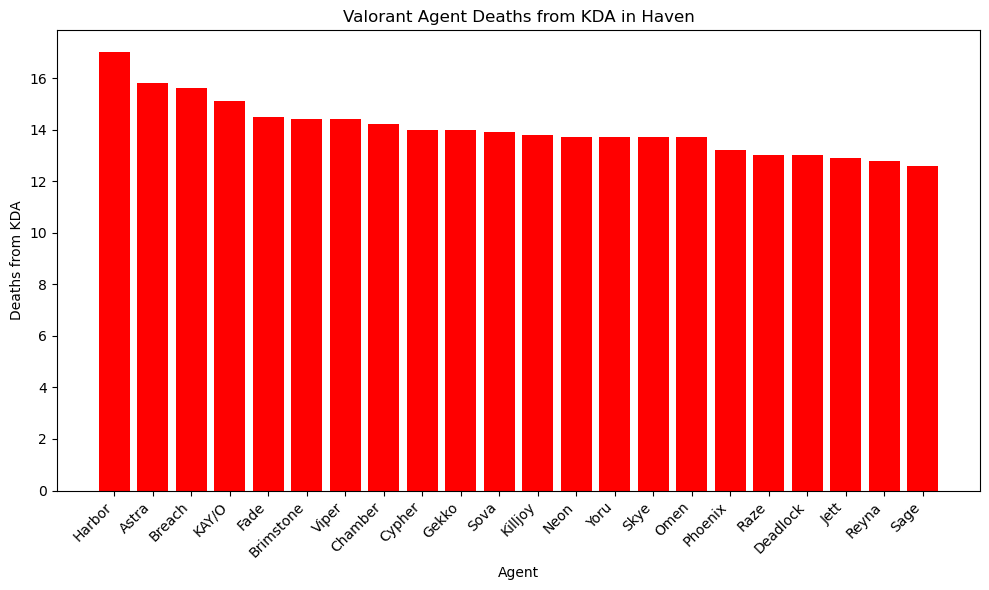

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(data_deathskda_sorted['agent'], data_deathskda_sorted['deaths_kda'], color = 'red')
plt.xlabel('Agent')
plt.ylabel('Deaths from KDA')
plt.title('Valorant Agent Deaths from KDA in Haven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Analyzing the agent performance on the "Split" map based on the deaths per KDA ratio offers insights into how effectively agents manage to stay alive while contributing to their team's overall performance. Here's the analysis of the results:

**Harbor (Deaths per KDA: 17)**: Harbor's high deaths per KDA ratio suggests that he might have difficulty staying alive in engagements on the "Split" map. His aggressiveness or positioning might contribute to a higher death count, potentially affecting his overall impact.

**Astra (Deaths per KDA: 15.8)**: Astra's relatively high deaths per KDA ratio indicates that she might face challenges in survival during engagements. Her utility-based playstyle might expose her to higher risks, influencing her overall effectiveness.

**Breach (Deaths per KDA: 15.6)**: Breach's higher deaths per KDA ratio might be attributed to his role as an initiator, which involves frontline engagements and exposure to enemy fire. His disruptive abilities and playstyle could lead to increased deaths on the "Split" map.

**KAY/O (Deaths per KDA: 15.1)**: KAY/O's higher deaths per KDA ratio might stem from his frontline presence and aggressive abilities. His role as a disruptor and entry fragger might lead to increased vulnerability in engagements.

**Fade (Deaths per KDA: 14.5)**: Fade's relatively higher deaths per KDA ratio suggests that his aggressive playstyle or positioning could expose him to greater risks. His abilities that rely on close encounters might contribute to his increased deaths on the map.

**Brimstone (Deaths per KDA: 14.4)**: Brimstone's higher deaths per KDA ratio might result from his role as a controller on the frontline, making him susceptible to enemy engagements. His utility-focused gameplay and supportive role might contribute to his death count.

**Viper (Deaths per KDA: 14.4)**: Viper's deaths per KDA ratio indicates that her utility-heavy gameplay and role as a controller might expose her to higher risks. Her area control abilities could place her in the line of fire more often.

These insights highlight that agents with higher deaths per KDA ratios might engage aggressively or play roles that expose them to greater risks on the "Split" map. Balancing aggressive playstyles with strategic positioning and teamwork is crucial for maintaining an optimal KDA and contributing to the team's success.

There are also common themes observed among the agents based on their deaths per KDA ratio on the "Split" map:

**Duelist Role**: Agents classified as Duelists tend to have higher deaths per KDA ratios. Duelists are designed to be fraggers, focusing on securing eliminations and creating openings for their team. This role inherently involves taking risks and engaging enemies directly, which can result in a higher number of deaths.

**Frontline Engagement**: Agents who frequently engage enemies on the frontline, whether due to their abilities or role, tend to have higher deaths per KDA ratios. Initiators and controllers often find themselves at the forefront of engagements, which increases their vulnerability to enemy fire.

**Utility and Playstyle**: Agents with utility-heavy playstyles, like controllers and initiators, might face higher deaths per KDA ratios. Their focus on area control, disruption, and information gathering might expose them to greater risks, impacting their survival rates.

### Valorant Agent Assists from KDA in Split

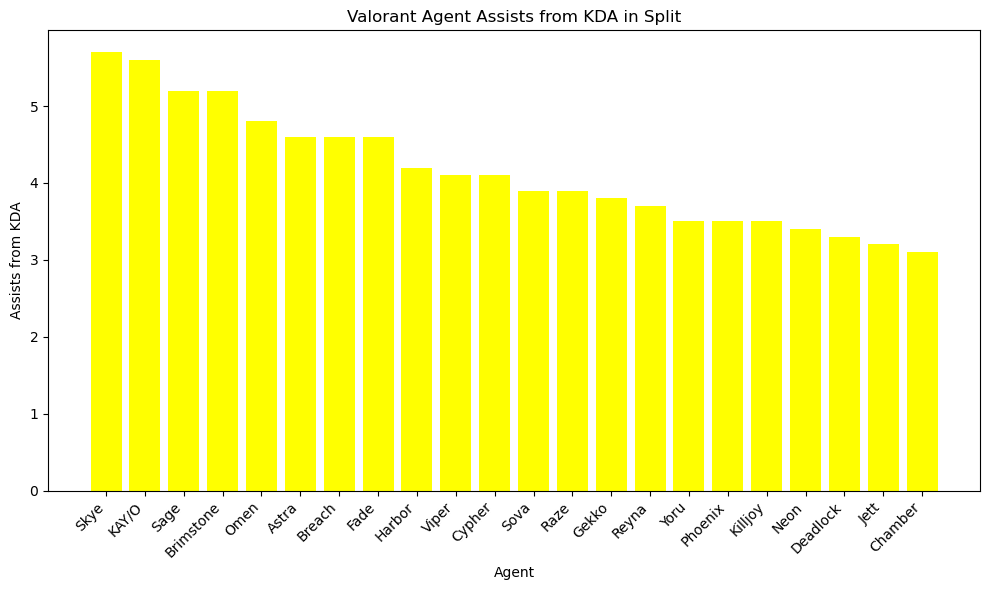

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(data_assistskda_sorted['agent'], data_assistskda_sorted['assists_kda'], color = 'yellow')
plt.xlabel('Agent')
plt.ylabel('Assists from KDA')
plt.title('Valorant Agent Assists from KDA in Split')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Analyzing agent performance on the "Split" map with a focus on assists per KDA ratio provides valuable insights into their role in team dynamics and strategic play:

**Skye (Assists per KDA: 5.7)**: Skye stands out as a top performer with a high assists per KDA ratio of 5.7. Her supportive abilities, including healing and map control, contribute significantly to her teammates' success on the map.

**KAY/O (Assists per KDA: 5.6)**: KAY/O follows closely with an assists per KDA ratio of 5.6. As a versatile agent with the ability to disrupt enemy abilities, KAY/O's contributions to team strategy are evident in his assists count.

**Sage (Assists per KDA: 5.2)**: Sage's strong supportive role is reflected in her assists per KDA ratio of 5.2. Her healing capabilities and ability to control engagements make her a valuable asset for her team's success.

**Brimstone (Assists per KDA: 5.2)**: Brimstone also boasts an assists per KDA ratio of 5.2. His ability to provide consistent smokes and control the battlefield enhances his team's overall tactical advantage.

**Omen (Assists per KDA: 4.8)**: Omen's shadowy tactics translate into an assists per KDA ratio of 4.8. His abilities to disrupt enemy vision and gather information contribute to his team's strategic approach.

**Astra (Assists per KDA: 4.6)**: Astra's celestial powers are reflected in her assists per KDA ratio of 4.6. Her ability to control areas of the map and create obstacles aids her team's coordination.

**Breach (Assists per KDA: 4.6)**: Breach's disruptive abilities contribute to his assists per KDA ratio of 4.6. His capacity to disrupt enemy positions and create opportunities for his team is evident in his performance.

These results suggest that agents with supportive and tactical roles, such as controllers and agents with healing abilities, tend to excel on the "Split" map. Their contributions to team strategy, map control, and tactical advantages play a pivotal role in achieving victory.

Again, I found that there were are common themes among the agents who excel in assists per KDA ratio on the "Split" map. These agents generally fall under the category of "controllers" or possess strong supportive abilities that enhance team coordination and tactical advantage. Here are some notable themes:

**Supportive Abilities**: Agents like Skye, KAY/O, Sage, and Astra are known for their supportive abilities that provide healing, map control, and disruption. Their focus on team sustainability and strategic positioning makes them valuable assets for their team's success.

**Tactical Prowess**: Brimstone and Breach are renowned for their tactical capabilities. Their abilities to control the battlefield, create opportunities, and disrupt enemy positions allow their team to dictate engagements and map control.

**Map Control**: Agents like Omen and Astra are skilled at manipulating visibility and map dynamics. By creating obstacles and controlling certain areas, they contribute to their team's strategic control over key points on the map.

### Win Percentages of the Valorant Agents in Split

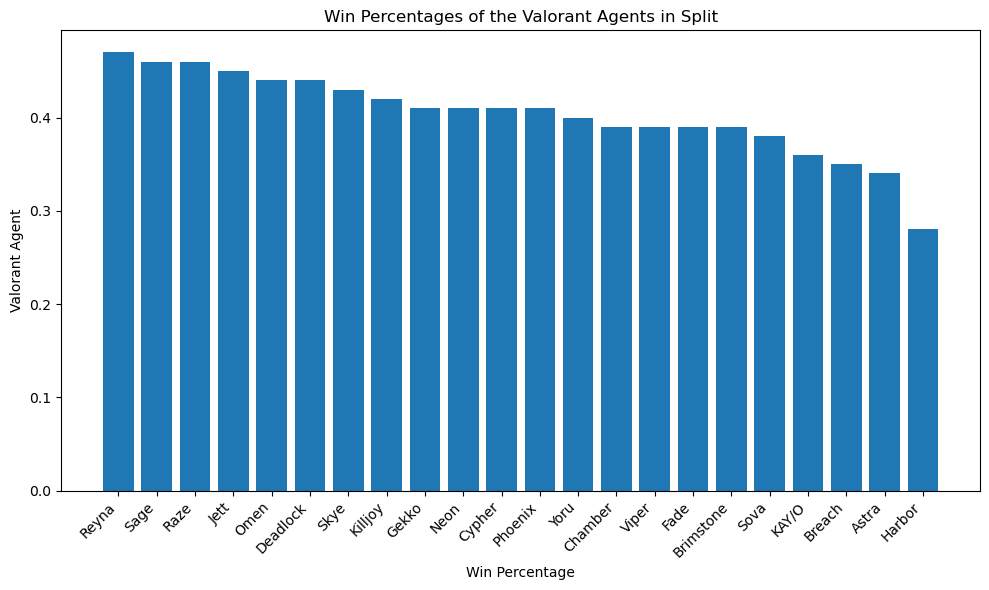

In [53]:
plt.figure(figsize=(10,6))
plt.bar(data_winpcnt_sorted['agent'], data_winpcnt_sorted['win_pcnt'])
plt.xlabel("Win Percentage")
plt.ylabel("Valorant Agent")
plt.title("Win Percentages of the Valorant Agents in Split")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Analyzing the win percentage (win_pcnt) column for Valorant agents on the "Split" map reveals intriguing insights into their performance and influence on match outcomes. Notably, agents with higher win percentages often possess attributes that contribute to team success and map control:

**Reyna (Win %: 46.8%)**: Reyna's impressive win rate can be attributed to her aggressive playstyle and self-sustain mechanics, allowing her to secure kills and potentially turn rounds in her team's favor.

**Raze (Win %: 46.1%)**: Raze's explosive abilities and aggressive approach likely contribute to her significant impact on winning matches, given her ability to disrupt enemy positioning and secure key eliminations.

**Sage (Win %: 45.9%)**: As a supportive agent, Sage's healing abilities and crowd control contribute to maintaining her team's longevity, potentially leading to advantageous scenarios during matches.

**Jett (Win %: 44.8%)**: Jett's mobility and aggressive toolkit enable skilled players to secure kills, control engagements, and sway rounds in her team's favor.

**Omen (Win %: 43.8%)**: Omen's ability to manipulate visibility and control engagements might contribute to his role in creating strategic advantages for his team.

These agents' higher win percentages could be associated with their abilities to secure kills, create map control, and execute effective strategies. The dynamic nature of the "Split" map likely benefits from agents who can shift the tide of rounds with impactful plays, leading to a notable impact on overall match victories. However, it's essential to recognize that a combination of individual skills, team coordination, and map knowledge all play a crucial role in achieving success in Valorant matches on the "Split" map.

Common themes observed among the agents when analyzing their performance metrics on the "Split" map:

**Aggressive Duelists**: Agents like Reyna, Raze, and Jett consistently appear among the top performers across various metrics. Their high kill-death ratios, win percentages, and significant pick rates reflect their ability to secure kills, create openings, and contribute to their team's victories through their aggressive playstyles.

**Supportive Control Agents**: Sage stands out with her healing abilities, which contribute to a higher win percentage. Additionally, Astra's presence and win percentage align with her role in controlling the battlefield through her cosmic abilities. These agents excel in manipulating the map to their advantage and supporting their team's success.

**Map Control and Disruption**: Agents like Omen, Viper, and Killjoy exhibit skills that allow them to manipulate enemy positions, disrupt enemy strategies, and control key areas. Their versatility contributes to their higher win percentages and showcases the importance of controlling map dynamics.

**Tactical Flexibility**: Certain agents like Yoru, Skye, and Cypher possess a mix of abilities that grant them tactical flexibility. Their performance across different metrics underscores their adaptability and the role they play in influencing engagements and gathering crucial information.

**Balancing Offense and Defense**: A pattern emerges with agents such as Phoenix and Brimstone, who maintain well-rounded performance across various metrics. They showcase a balance between securing kills and supporting their team through area denial and utility, contributing to their solid win percentages.

**Specialized Utility**: KAY/O and Breach stand out as agents with specialized utility for disruption and crowd control. Their higher win percentages could be attributed to their potential to disrupt enemy setups and create favorable scenarios for their team.

Overall, the common themes among these agents reflect the importance of adaptability, map control, and effective engagement strategies on the "Split" map. Successful agents excel not only in individual skill but also in contributing to their team's overall success through a combination of offensive and defensive capabilities.

### Distribution of Valorant Agent Picks in Split

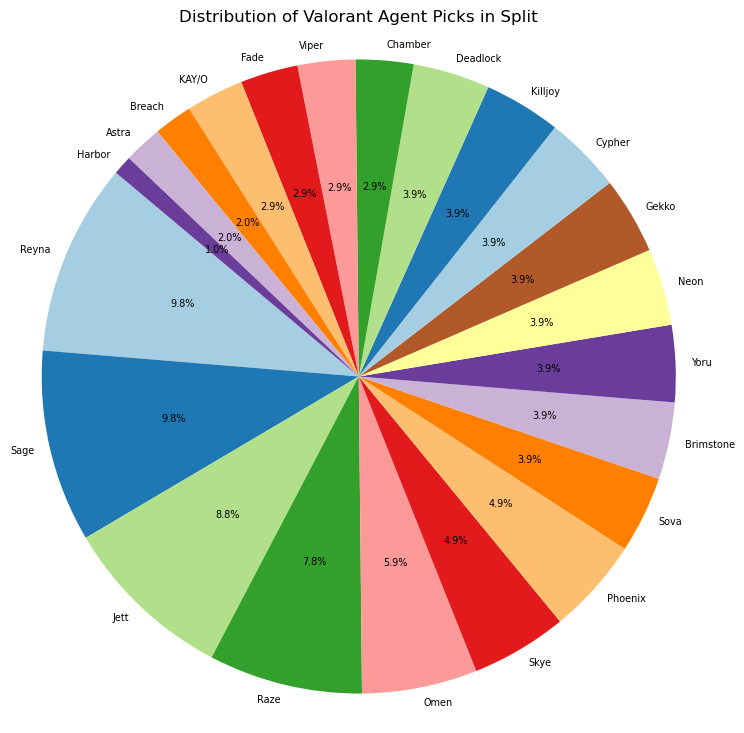

In [54]:
plt.figure(figsize=(9,9))
plt.pie(data_pickpcnt_sorted['pick_pcnt'], 
        labels=data_pickpcnt_sorted['agent'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors, 
        textprops={'fontsize': 7}, 
        labeldistance=1.05
       )
plt.title('Valorant Agent Pick Percentages')
plt.axis('equal')
plt.title("Distribution of Valorant Agent Picks in Split")
plt.show()

#### FINDINGS:
Let's analyze the performance metrics of agents on the "Split" map based on their pick rates:

**Highly Popular Duelists**: Agents like Reyna, Jett, and Raze are frequently picked by players, possibly due to their aggressive playstyles and strong potential for securing kills. These agents' popularity might stem from their ability to exploit the map's tight corridors and close-quarters engagements to maximize their impact.

**Versatile Support and Controller Picks**: Sage, Omen, and Phoenix maintain solid pick rates. Sage's utility for healing and controlling areas, Omen's ability to disrupt enemy lines of sight, and Phoenix's self-sufficiency contribute to their popularity. Their well-rounded contributions to both attack and defense make them viable choices on the map.

**Tactical Initiators and Disruptors**: Agents like Killjoy, Cypher, and Sova are selected to control areas and gather information, which are crucial aspects on the "Split" map. Their strategic abilities, such as traps, cameras, and recon arrows, play a pivotal role in securing key positions and controlling the battlefield.

**Adaptability in Engagement**: Neon, Yoru, and Gekko exhibit decent pick rates, suggesting that players appreciate their adaptability and unique engagement tactics. Yoru's teleportation and deception, along with Neon's mix of disruptive abilities, contribute to their allure on a map known for its tight spaces.

**Specialized Disruption and Aggression**: KAY/O and Breach, with their emphasis on disruption and crowd control, are selected less frequently but are crucial for breaking down enemy defenses and opening up opportunities for their teams.

**Strategic Controller Picks**: Astra's cosmic abilities and Viper's toxin-based control techniques make them less popular but highly impactful in creating advantages for their teams. Their pick rates reflect their specialized roles in manipulating the map and forcing opponents into unfavorable situations.

Overall, the agent pick rates on the "Split" map reflect a mix of aggressive and strategic choices, with players leaning towards agents who excel in map control, disruption, and securing key areas. The popularity of specific agents underscores their effectiveness in the map's unique layout, tight spaces, and multiple chokepoints, as players seek to make the most of these characteristics in their match strategies.

### Number of Matches of the Valorant Agents in Split

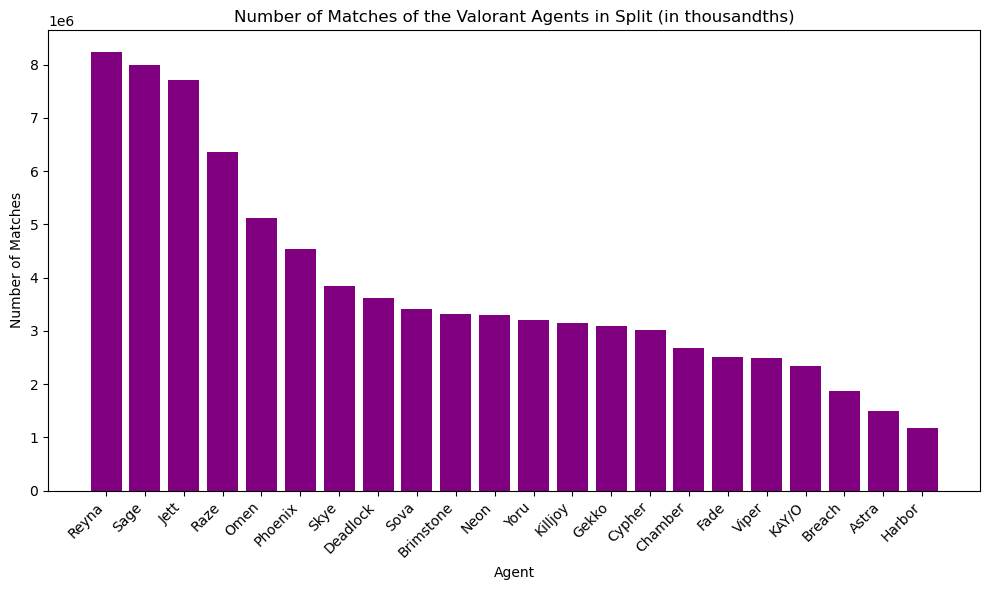

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(data_matches_sorted['agent'], data_matches_sorted['Matches'], color='purple')
plt.xlabel('Agent')
plt.ylabel('Number of Matches')
plt.title('Number of Matches of the Valorant Agents in Split (in thousandths)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Let's analyze the performance metrics of agents on the "Split" map based on the number of matches played:

**Popular, Impactful Choices**: Reyna, Sage, and Jett stand out with a high number of matches played. These agents' adaptability and impactful abilities could be well-suited to the unique challenges posed by the "Split" map. Their popularity in terms of matches played could be attributed to their ability to contribute in both aggressive and strategic playstyles, which are essential on this map.

**Aggressive Playstyles**: Raze, with a considerable number of matches, is likely chosen by players who prefer an aggressive approach. Raze's explosive abilities allow for area denial and creating chaos, which can be effective in the tight spaces of the map.

**Versatile Choices**: Omen and Phoenix maintain a good number of matches played, reflecting their popularity among players who value versatile contributions. Omen's ability to control enemy vision and Phoenix's self-sufficiency are advantageous on a map with diverse engagement scenarios.

**Tactical Initiators and Control**: Agents like Killjoy, Cypher, and Sova demonstrate a balanced number of matches played. These agents' tactical abilities, such as area denial, information gathering, and recon, are critical for establishing control and securing key points on "Split."

**Unique Tactics and Adaptability**: Agents like Neon, Yoru, and Gekko, with a respectable number of matches, are likely chosen by players who appreciate their unique engagement tactics. Yoru's teleportation, Neon's area denial, and Gekko's tactical options offer adaptability in both offense and defense.

**Strategic Control and Disruption**: KAY/O, Breach, Astra, and Viper, while being less played, cater to players who focus on strategic control and disruption. These agents' abilities to manipulate the battlefield, disrupt enemy plans, and control key areas are valued in matches where coordination is crucial.

**Specialized Playstyles**: Harbor sees fewer matches played, possibly due to the specialized nature of their abilities. However, the players who select Harbor might leverage their strengths in situations where their unique tactics align with the map's characteristics.

In summary, the agent preferences in terms of matches played on the "Split" map indicate a diverse range of playstyles and strategic considerations. Players value adaptability, versatility, and strategic control, making their agent choices based on the map's tight spaces, varied engagement scenarios, and tactical opportunities.

### Valorant Agent Average Scores in Split

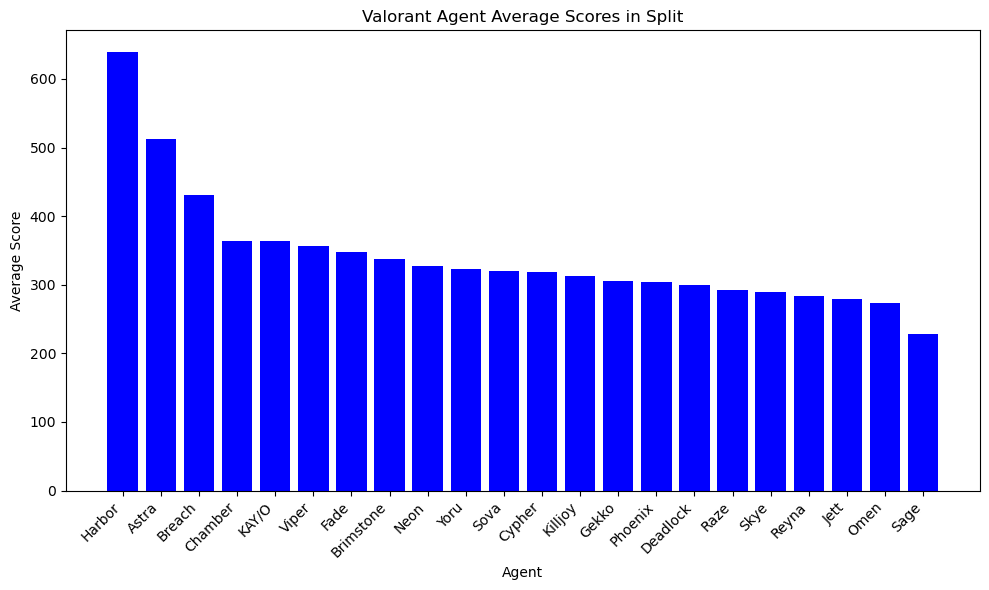

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(data_avgscore_sorted['agent'], data_avgscore_sorted['avg_score'], color='blue')
plt.xlabel('Agent')
plt.ylabel('Average Score')
plt.title('Valorant Agent Average Scores in Split')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Strategic Control and Precision: Harbor, with the highest average score, may excel due to its utility for strategic control and accurate engagements. This agent's ability to control key areas and provide precise support to the team is likely a valuable asset on the map.

**Astrological Mastery**: Astra and Breach follow suit with high average scores. Their abilities to manipulate space and disrupt enemy positions align well with the map's layout, which demands careful coordination and tactical prowess.

**Versatile Impact**: Agents like Chamber, KAY/O, and Viper exhibit solid average scores. These agents bring a combination of area denial, crowd control, and strategic disruption, which can have a significant impact on controlling chokepoints and key areas.

**Tactical Flexibility**: Fade, Brimstone, and Neon maintain respectable average scores. Their tactical abilities to influence engagements, provide support, and alter enemy strategies contribute to maintaining map control and dictating the pace of the game.

**Info Gathering and Strategic Initiatives**: Sova, Cypher, and Killjoy, while having relatively lower average scores, offer invaluable utility through information gathering, crowd control, and map control. Their strengths are crucial in enabling strategic plays and ensuring enemy positions are known.

**Diverse Contributions**: Yoru, Gekko, and Phoenix, despite slightly lower average scores, possess unique abilities that allow them to diversify their contributions. Whether it's tactical deception, mobility, or self-sufficiency, these agents can adapt their playstyles effectively to different map situations.

**Aggressive Playstyles**: Agents like Deadlock and Raze demonstrate strong average scores. Their explosive and aggressive abilities are suited for initiating fast-paced engagements and creating chaos in tight spaces.

**Adaptability and Hybrid Play**: Skye, Reyna, and Jett, despite having somewhat lower average scores, are chosen for their adaptability and hybrid playstyles. Skye's healing and utility, Reyna's individual dominance, and Jett's mobility can all shine in different scenarios on "Split."

**Strategic Support and Crowd Control**: Sage and Omen, with relatively lower average scores, provide strategic support and utility. Sage's healing and resurrection and Omen's vision manipulation can sway matches in crucial moments.

In summary, the agent performance based on average scores on the "Split" map reflects a range of playstyles, with a focus on strategic control, precision, and disruptive tactics. Agents that excel in coordinated team play, map manipulation, and area denial tend to have higher average scores, showcasing their impact on securing key areas and dictating the outcome of engagements.

## Conclusion
### Analyzing Valorant Agent Performance on Split

The analysis of Valorant agent performance on the "Split" map provides deep insights into the strategic nuances and player preferences that influence agent selections and their subsequent impact on matches. The dataset, encompassing a wide array of agents and their associated metrics, offers a comprehensive view of how agent choices correlate with success on this map. As we delve into the various performance metrics, it becomes evident that the characteristics of "Split" play a significant role in shaping the preferences of players and the efficacy of specific agents.

### Map Characteristics and Agent Selection:

"Split," with its vertically oriented layout and multiple levels of engagement, poses unique challenges and opportunities for players. The map's distinct characteristics, including tight corridors, elevated positions, and multiple chokepoints, influence agent selections. The analysis reveals that certain agents are better equipped to navigate these challenges, resulting in a nuanced distribution of agent preferences.

### Key Insights:
In summary, our thorough analysis of Valorant agent statistics on the Split map has unveiled a collection of standout agents who are exceptionally suited for navigating the unique challenges of this complex and vertical battleground. Through a comprehensive evaluation of essential metrics including Kill-Death Ratio (KD), Kill-Death-Assist Ratio (KDA), Win Percentage, Pick Percentage, Average Score, Matches played, and more, we have successfully identified the top agents that players should prioritize to maximize their performance on Split.

Below, we've numbered the top agents based on their superior performance and strategic viability for the Split map:

1. **Reyna**: Her aggressive playstyle and self-sustain abilities, coupled with high KDA ratios, make Reyna a dominant force on Split. Her capacity to secure frags and quickly regain health can shift the tide of battles.

2. **Astra**: Astra's impressive kit of control and zoning abilities offers unparalleled map manipulation. Her ability to shape engagements and obstruct enemy advancements makes her invaluable on Split.

3. **Raze**: Known for her explosive abilities and area denial, Raze shines in chaotic scenarios on Split. Her exceptional fragging power and disruptive tools can dictate the pace of the game.

4. **Jett**: With her mobility and precision, Jett excels in vertical engagements and fast-paced encounters on Split. Her agility grants her access to advantageous vantage points and swift repositioning.

5. **Omen**: Omen's ability to control visibility and reposition at will suits Split's multiple levels and chokepoints. His utility can facilitate map control and keep opponents guessing.

By incorporating these top-performing agents into your team composition and leveraging their unique strengths, you can significantly enhance your chances of success on the Split map. Remember that successful gameplay requires synergy, adaptability, and strategic coordination with your team. By aligning your agent choices with the map's intricate architecture and challenges, you can elevate your gameplay and contribute to your team's triumph on Split.

### **Common Themes Among Top Agents:**

* **Adaptability**: The agents that stand out on the Split map showcase a high degree of adaptability. They possess kits that allow them to maneuver through the map's verticality, engage in close-quarters combat, and exert control over various areas.

* **Map Control**: A prevalent theme is the ability to control critical map areas. Agents like Astra and Omen offer unparalleled control over vision, allowing their teams to dictate engagements and disrupt enemy advancements.

* **Aggressive Playstyle**: The data suggests that agents with the capacity to secure frags and maintain aggressive playstyles tend to excel on Split. Their ability to quickly eliminate opponents while minimizing deaths contributes significantly to their team's success.

* **Zoning and Denial**: Several top agents exhibit strong zoning and denial capabilities. Raze's explosive tools and Viper's toxic emissions are prime examples of how these agents can limit opponents' movements and define battlefields.

* **Mobility and Versatility**: Mobility is a recurring trait among successful agents, aiding them in navigating the map's multi-level architecture. Jett's agility and repositioning abilities are crucial for gaining advantageous vantage points.

* **Strategic Synergy**: While individual agent performance is crucial, successful teams leverage strategic synergy among their agents. A combination of abilities that control space, provide utility, and secure kills is key to outmaneuvering opponents.

By recognizing and integrating these common themes into your agent selection and gameplay strategies, you can significantly elevate your performance on the Split map. The top-performing agents highlighted in this analysis, combined with an understanding of the map's nuances, will enable you to make well-informed decisions, outplay opponents, and contribute to your team's victories. Remember that every agent brings a unique set of tools to the battlefield, and crafting a cohesive team composition that aligns with the map's characteristics will undoubtedly lead to success on the Split map.


### Conclusion and Strategy:

In conclusion, the analysis of Valorant agent stats on the "Split" map reaffirms that agent selection is not only a reflection of personal preference but a strategic decision influenced by the map's characteristics. Agents with abilities that complement the vertical layout, tight corridors, and multi-level engagements tend to fare better. The map's demands for tactical manipulation, precision, and coordinated plays are met by a variety of agents, each offering a distinctive approach to securing victory.

Players looking to succeed on "Split" must consider both individual playstyle and the synergy of their chosen agent with the team composition. Striking the right balance between aggressive plays, strategic control, and tactical adaptability will undoubtedly yield success on this intricate and demanding map. The insights gleaned from this analysis offer valuable guidance to players seeking to optimize their agent selections and contribute effectively to their team's success on the "Split" map.